In [1]:
import pandas as pd
import re
import matplotlib as mlt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.axes as axes
import  math

#!{sys.executable} -m pip install seaborn
import seaborn as sb

In [2]:
dataset = pd.read_csv("datasets/Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv")
dataset

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,04/16/2019,11:00,"Puerto Montt, Chile",Archipelagos Service Aereos,NaN,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p..."
4963,05/05/2019,18:30,"Near Monclava, Mexico",TVPX Aircraft Solutions,NaN,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...
4964,05/05/2019,18:30,"Moscow, Russia",Aeroflot Russian International Airlines,NaN,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...
4965,06/03/2019,13:00,"Near Lipo, India",Military - Indian Air Force,NaN,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,13.0,5.0,8.0,0.0,Crashed about 34km WNW of Mechuka.


---
---
# Gabro

#### Cleaning colonna **Operator**

In [3]:
print("numero di Na:", len([i for i in dataset.Operator if type(i) == float])) # abbiamo solo 10 Na
print(dataset.shape)

# Eliminazione righe contenenti Na nella colonna Operator
dataset = dataset[dataset['Operator'].notna()]
print(dataset.shape)

numero di Na: 10
(4967, 17)
(4957, 17)


Identificazione e raggruppamento categoria di operatore militare

In [4]:
print(len(dataset['Operator'].unique()))

military_flights = []

military_words = ["army", "navy", "marine", "military", "force", "airforce", "amee de l'air"]

# Identifica tutti i nomi degli operatori che appartengono al campo militare
for operator in dataset['Operator'].unique():
    for word in military_words:
        if word.lower() in operator.lower() and operator not in military_flights: military_flights.append(operator)

# Identifica tutti i nomi degli operatori che in Route hanno Test flight e Test presumendo che si trattino anche essi di voli militari
test_flights = ["Test", "Test flight"]
for position, operator in enumerate(dataset['Operator']):
    if dataset.Route.iloc[position] in test_flights and operator not in military_flights: military_flights.append(operator)


print("numero di operatori militari univoci:", len(military_flights))  # 251 valori univoci relativi

2242
numero di operatori militari univoci: 276


Identificazione e raggruppamento categoria di operatore postale

In [5]:
postal_cargo_flights = []

postal_e_cargo_words = ["postal", "mail", "aeropostale", "cargo", "express"]

# Identifica tutti i nomi degli operatori che appartengono al campo militare
for operator in dataset['Operator'].unique():
    if type(operator) != float:
        for word in postal_e_cargo_words:
            if word.lower() in operator.lower() and operator not in postal_cargo_flights: postal_cargo_flights.append(operator)

print("numero di operatori postali/cargo univoci:", len(postal_cargo_flights))

numero di operatori postali/cargo univoci: 82


Identificazione e raggruppamento categoria di operatore privato

In [7]:
private_flights = []

private_words = ["priva"]

# Identifica tutti i nomi degli operatori che appartengono al campo militare
for operator in dataset['Operator'].unique():
    if type(operator) != float:
        for word in private_words:
            if word.lower() in operator.lower() and operator not in private_flights: private_flights.append(operator)

print("numero di operatori privati univoci:", len(private_flights))

numero di operatori privati univoci: 45


#### Aggiunta valori per la nuova colonna

In [8]:
new_column = []

for value in dataset.Operator:
    if value in military_flights:
        new_column.append("Military flight")
    elif value in postal_cargo_flights:
        new_column.append("Postal/Cargo flight")
    elif value in private_flights:
        new_column.append("Private flights")
    else: new_column.append("Scheduled flight")

## ambulance --> decidere se assegnare una macro categoria

In [9]:
dataset = dataset.assign(New_Operator_column=new_column)
dataset

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,New_Operator_column
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",Military flight
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,Military flight
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Private flights
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...,Military flight
5,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,NaN,NaN,30.0,NaN,NaN,0.0,Hydrogen gas which was being vented was sucked...,Military flight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,04/16/2019,11:00,"Puerto Montt, Chile",Archipelagos Service Aereos,NaN,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p...",Scheduled flight
4963,05/05/2019,18:30,"Near Monclava, Mexico",TVPX Aircraft Solutions,NaN,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...,Scheduled flight
4964,05/05/2019,18:30,"Moscow, Russia",Aeroflot Russian International Airlines,NaN,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...,Scheduled flight
4965,06/03/2019,13:00,"Near Lipo, India",Military - Indian Air Force,NaN,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,13.0,5.0,8.0,0.0,Crashed about 34km WNW of Mechuka.,Military flight


In [10]:
print(len(dataset.New_Operator_column.unique()))

4


#### Cleaning colonna **Route**

In [ ]:
print("numero di NaN nella colonna Time:", len([i for i in dataset.Route if type(i) == float]))  # 774.. Non troppi, quindi da eliminare

In [ ]:
rotte = []

for route in dataset.Route:
    if type(route) != float: rotte.append(route.split("-"))
    else: rotte.append(route)

rotte_pulite = []
for route in rotte:
    new_route = []
    if type(route) != float:
        for aeroport in route:
            if "," in aeroport: new_route.append(re.sub(f",.+", "", aeroport))
            else: new_route.append(aeroport)
    else: new_route.append(route)
    rotte_pulite.append(new_route)

print(rotte_pulite)

#### Aggiunta colonna Aeroporto_di_partenza

In [ ]:
# Aggiunta colonna Aeroporto_di_partenza
aeroporto_partenza = [aeroporto[0] for aeroporto in rotte_pulite]
dataset = dataset.assign(Aeroporto_di_partenza=aeroporto_partenza)

dataset

#### Aggiunta colonne per aeroporti intermedi
Il numero massimo di aeroporti nelle rotte è 7 quindi andranno create 7 nuove colonne

In [ ]:
# for aeroporto in rotte_pulite:
#     if len(aeroporto) == 7: print(aeroporto)

aeroporto_di_destinazione = []
aeroporto_2 = []
aeroporto_3 = []
aeroporto_4 = []
aeroporto_5 = []
aeroporto_6 = []


# Molto brutto... Decidere se cambiare
for n_aeroporti in rotte_pulite:
    if len(n_aeroporti) == 1:
        aeroporto_di_destinazione.append(n_aeroporti)
        aeroporto_2.append("Nan")
        aeroporto_3.append("Nan")
        aeroporto_4.append("Nan")
        aeroporto_5.append("Nan")
        aeroporto_6.append("Nan")
    if len(n_aeroporti) == 2:
        aeroporto_di_destinazione.append(n_aeroporti[-1])
        aeroporto_2.append("Nan")
        aeroporto_3.append("Nan")
        aeroporto_4.append("Nan")
        aeroporto_5.append("Nan")
        aeroporto_6.append("Nan")
    if len(n_aeroporti) == 3:
        aeroporto_2.append(n_aeroporti[1])
        aeroporto_di_destinazione.append(n_aeroporti[-1])
        aeroporto_3.append("Nan")
        aeroporto_4.append("Nan")
        aeroporto_5.append("Nan")
        aeroporto_6.append("Nan")
    if len(n_aeroporti) == 4:
        aeroporto_2.append(n_aeroporti[1])
        aeroporto_3.append(n_aeroporti[2])
        aeroporto_di_destinazione.append(n_aeroporti[-1])
        aeroporto_4.append("Nan")
        aeroporto_5.append("Nan")
        aeroporto_6.append("Nan")
    if len(n_aeroporti) == 5:
        aeroporto_2.append(n_aeroporti[1])
        aeroporto_3.append(n_aeroporti[2])
        aeroporto_4.append(n_aeroporti[3])
        aeroporto_di_destinazione.append(n_aeroporti[-1])
        aeroporto_5.append("Nan")
        aeroporto_6.append("Nan")
    if len(n_aeroporti) == 6:
        aeroporto_2.append(n_aeroporti[1])
        aeroporto_3.append(n_aeroporti[2])
        aeroporto_4.append(n_aeroporti[3])
        aeroporto_5.append(n_aeroporti[4])
        aeroporto_di_destinazione.append(n_aeroporti[-1])
        aeroporto_6.append("Nan")
    if len(n_aeroporti) == 7:
        aeroporto_2.append(n_aeroporti[1])
        aeroporto_3.append(n_aeroporti[2])
        aeroporto_4.append(n_aeroporti[3])
        aeroporto_5.append(n_aeroporti[4])
        aeroporto_6.append(n_aeroporti[5])
        aeroporto_di_destinazione.append(n_aeroporti[-1])

# Alcuni valori di aeroporto_di destinazione erano in una lista. Risolviamo:
for position, aeroporto in enumerate(aeroporto_di_destinazione):
    if type(aeroporto) == list:
        aeroporto_di_destinazione[position] = aeroporto[0]

dataset = dataset.assign(Aeroporto_2=aeroporto_2,
                         Aeroporto_3=aeroporto_3,
                         Aeroporto_4=aeroporto_4,
                         Aeroporto_5=aeroporto_5,
                         Aeroporto_6=aeroporto_6,
                         Aeroporto_di_destinazione=aeroporto_di_destinazione)

dataset

### Cleaning AC type

Ricordarsi di agiungere un .upper anche dopo il primo else una volta che abbiamo deciso di eliminare gli Na

In [ ]:
# Prima pulizia

print(len(dataset["AC Type"].unique()))

simplified_aircraft_names = []

# Eliminazione dei pattern tipo "15-L ..." e "V-17 ..."
for airplane in dataset["AC Type"]:
    if type(airplane) != float and len(airplane.split()) > 1:
        simplified_aircraft_names.append(re.sub(r"[A-Z0-9]+-.+", "", airplane).upper())
    else: simplified_aircraft_names.append(airplane)

# Eliminazione dei pattern tipo "15.L ..." e "V.17 ..."
simplified_aircraft_names_1 = []
for position, airplane in enumerate(simplified_aircraft_names):
    if type(airplane) != float and len(airplane.split()) > 1:
        simplified_aircraft_names_1.append(re.sub(r"[A-Z0-9]+\.(.)+", "", airplane))
    else: simplified_aircraft_names_1.append(airplane)

print(simplified_aircraft_names_1)

*Decidere se pulire maggiormente o meno*

In [ ]:
dataset = dataset.assign(AC_Type_simplified=simplified_aircraft_names_1)
print(f"Prima della pulizia: {len(dataset['AC Type'].unique())} valori univoci")
print(f"Dopo la pulizia: {len(dataset['AC_Type_simplified'].unique())} valori univoci")

### Controllo valori nulli delle colonne:
- Aboard
- Aboard Crew
- Aboard Passangers
- Fatalities
- Fatalities Crew
- Fatalities Passangers
- Ground

In [ ]:
def na_counter_for_numeric_column(column, nome_colonna):
    nas = []
    for value in column:
        try:
            int(value)
        except:
            nas.append(value)
    return print(f"Numero di Na della colonna {nome_colonna}: {len(nas)}")

na_counter_for_numeric_column(dataset["Aboard"], "Aboard")
na_counter_for_numeric_column(dataset["Aboard Crew"], "Aboard Crew")
na_counter_for_numeric_column(dataset["Aboard Passangers"], "Aboard Passangers")
na_counter_for_numeric_column(dataset["Fatalities"], "Fatalities")
na_counter_for_numeric_column(dataset["Fatalities Crew"], "Fatalities Crew")
na_counter_for_numeric_column(dataset["Fatalities Passangers"], "Fatalities Passangers")

##### **Gli Na delle colonne Aboard e Fatalities secondo me si possono eliminare, magari quelli delle altre invece li sostituiamo con le medie**

---
---
# Maic

In [ ]:
print("numero di NaN nella colonna Time:", len([i for i in dataset.Time if type(i) == float])) # abbiamo solo 10 Na

In [ ]:
for w in dataset.Location:
    print(w)

In [ ]:
dataset.keys()

In [ ]:
dataset.keys()

###    Leo

Change data format


In [ ]:
print(dataset['Date'])

In [ ]:
new_date=[]

In [ ]:
for i in dataset.Date :
    #print (re.findall('[0-9]{4}',i))
    new_date.append(*re.findall('[0-9]{4}',i))
    #a = a.append(i[i.re.findall('[0-9]{4}',i)])
print(new_date)


In [ ]:
dataset=dataset.assign(Year=new_date)

In [ ]:
dataset.columns

In [ ]:
print(type(dataset.Year))

In [ ]:
for i in dataset.Year:
    print(type(i))

In [ ]:
dataset["Year"]=dataset["Year"].astype(int)

La colonna Date è rimasta all'interno del dataset senza subire modifiche, è stata invece aggiunta una nuova colonna denominata Year contenente solo l'anno presente nella colonna Date, al fine di eliminare il problemma di disomogeneità dei dati a causa dei diversi formati dd/mm/yyyy e mm/dd/yyyy presenti nel dataset a causa delle differene fra sistema anglosassone ed europeo.

Ovviamente nel codice sono presenti dei print esclusivamente a fini di comprensione del lavoro che possono essere eliminati nella versione finale.

###     Osservazione variabile Time


In [ ]:
ore=[]

In [ ]:
for i in dataset.Time :
        #if type(i) == float:
         #   print(i)
        if type(i) == str:
            ore.append(i)

print(ore,len(ore))

In [ ]:
bbb= 0
for i in dataset.Time :
        if type(i) == float:
            bbb = bbb+1
print(bbb)

In [ ]:
bb= 0
for i in dataset.Time :
        if type(i) == str:
            bb = bb+1
print(bb)

In [ ]:
new_ore = []
for i in ore:
    #print(i,re.sub(rf"[:].*","",i))
    #i = (re.sub(rf"[:].*","",i))
    new_ore.append(re.sub(rf"[:].*","",i))
print(new_ore,len(new_ore))



In [ ]:
f=0
for i in new_ore:
    i=int(i)
    f=f+1
    #print(i,type(i))
print(f)

In [ ]:
int_ore=[]
for i in new_ore:
    int_ore.append(int(i))
print(len(int_ore),int_ore,type(int_ore[2]))

In [ ]:
dataset=dataset.assign(Hour=new_ore)

###    Leo

Change data format


In [ ]:
print(dataset['Date'])

In [ ]:
new_date=[]

In [ ]:
for i in dataset.Date :
    #print (re.findall('[0-9]{4}',i))
    new_date.append(*re.findall('[0-9]{4}',i))
    #a = a.append(i[i.re.findall('[0-9]{4}',i)])
print(new_date)


In [ ]:
dataset=dataset.assign(Year=new_date)

In [ ]:
dataset.columns

In [ ]:
print(type(dataset.Year))

In [ ]:
for i in dataset.Year:
    print(type(i))

In [ ]:
dataset["Year"]=dataset["Year"].astype(int)

La colonna Date è rimasta all'interno del dataset senza subire modifiche, è stata invece aggiunta una nuova colonna denominata Year contenente solo l'anno presente nella colonna Date, al fine di eliminare il problemma di disomogeneità dei dati a causa dei diversi formati dd/mm/yyyy e mm/dd/yyyy presenti nel dataset a causa delle differene fra sistema anglosassone ed europeo.

Ovviamente nel codice sono presenti dei print esclusivamente a fini di comprensione del lavoro che possono essere eliminati nella versione finale.

###     Osservazione variabile Time


In [ ]:
ore=[]

In [ ]:
for i in dataset.Time :
        #if type(i) == float:
         #   print(i)
        if type(i) == str:
            ore.append(i)

print(ore,len(ore))

In [ ]:
bbb= 0
for i in dataset.Time :
        if type(i) == float:
            bbb = bbb+1
print(bbb)

In [ ]:
bb= 0
for i in dataset.Time :
        if type(i) == str:
            bb = bb+1
print(bb)

In [ ]:
new_ore = []
for i in ore:
    #print(i,re.sub(rf"[:].*","",i))
    #i = (re.sub(rf"[:].*","",i))
    new_ore.append(re.sub(rf"[:].*","",i))
print(new_ore,len(new_ore))



In [ ]:
f=0
for i in new_ore:
    i=int(i)
    f=f+1
    #print(i,type(i))
print(f)

In [ ]:
int_ore=[]
for i in new_ore:
    int_ore.append(int(i))
print(len(int_ore),int_ore,type(int_ore[2]))

In [ ]:
for i in int_ore:
    if i > 24:
        print(i)
import math
import numpy
print(numpy.mean(int_ore))

In [ ]:

patches=plt.hist(int_ore)
np.arange()

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

In [ ]:
#dataset=dataset.assign(Hour=new_ore)

###    Leo

Change data format


In [4]:
print(dataset['Date'])

0       09/17/1908
1       09/07/1909
2       07/12/1912
3       08/06/1913
4       09/09/1913
           ...    
4962    04/16/2019
4963    05/05/2019
4964    05/05/2019
4965    06/03/2019
4966    07/30/2019
Name: Date, Length: 4967, dtype: object


In [56]:
new_date=[]

In [57]:
for i in dataset.Date :
    #print (re.findall('[0-9]{4}',i))
    new_date.append(*re.findall('[0-9]{4}',i))
    #a = a.append(i[i.re.findall('[0-9]{4}',i)])
print(new_date)


['1908', '1909', '1912', '1913', '1913', '1913', '1915', '1915', '1916', '1916', '1916', '1916', '1916', '1917', '1917', '1917', '1917', '1917', '1917', '1917', '1918', '1918', '1918', '1918', '1919', '1919', '1919', '1919', '1919', '1919', '1919', '1919', '1919', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1924', '1924', '1924', '1924', '1924', '1924', '1924', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1927', '1927', '1927', '1927', '1927',

In [58]:
dataset=dataset.assign(Year=new_date)

In [59]:
dataset.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary', 'Year'],
      dtype='object')

In [60]:
print(type(dataset.Year))

<class 'pandas.core.series.Series'>


In [65]:
for i in dataset.Year:
    print(type(i))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

In [64]:
dataset["Year"]=dataset["Year"].astype(int)

La colonna Date è rimasta all'interno del dataset senza subire modifiche, è stata invece aggiunta una nuova colonna denominata Year contenente solo l'anno presente nella colonna Date, al fine di eliminare il problemma di disomogeneità dei dati a causa dei diversi formati dd/mm/yyyy e mm/dd/yyyy presenti nel dataset a causa delle differene fra sistema anglosassone ed europeo.

In [ ]:
dataset=dataset.assign(Hour=new_ore)

###     Osservazione variabile Time


In [111]:
ore=[]

In [112]:
for i in dataset.Time :
        #if type(i) == float:
         #   print(i)
        if type(i) == str:
            ore.append(i)

print(ore,len(ore))

['17:18', '06:30', '18:30', '10:30', '01:00', '15:20', '01:00', '23:45', '23:45', '05:15', '08:45', '07:00', '07:45', '21:30', '10:00', '16:55', '12:15', '17:40', '11:40', '13:15', '16:45', '13:42', '17:30', '18:00', '02:30', '12:00', '05:30', '09:30', '15:27', '13:15', '08:00', '08:30', '04:05', '10:00', '14:48', '11:00', '91:5', '11:30', '10:00', '08:00', '10:45', '17:00', '09:18', '11:45', '08:00', '11:30', '21:00', '11:01', '18:00', '18:00', '07:00', '10:10', '09:35', '17:00', '18:23', '17:30', '17:00', '15:00', '15:45', '02:05', '09:45', '20:0', '22:40', '13:00', '10:45', '23:30', '22:30', '09:00', '08:40', '20:00', '04:00', '06:48', '22:30', '05:45', '16:00', '02:00', '19:30', '12:00', '08:00', '00:10', '09:00', '06:00', '02:07', '20:07', '14:30', '12:30', '07:40', '15:00', '03:15', '17:00', '15:40', '01:00', '21:00', '11:20', '22:35', '15:00', '16:00', '13:00', '18:15', '14:15', '05:00', '17:00', '11:00', '06:00', '09:50', '22:45', '10:50', '23:42', '05:30', '07:30', '03:33', '0

In [113]:
bbb= 0
for i in dataset.Time :
        if type(i) == float:
            bbb = bbb+1
print(bbb)

1510


In [114]:
bb= 0
for i in dataset.Time :
        if type(i) == str:
            bb = bb+1
print(bb)

3457


In [115]:
new_ore = []
for i in ore:
    #print(i,re.sub(rf"[:].*","",i))
    #i = (re.sub(rf"[:].*","",i))
    new_ore.append(re.sub(rf"[:].*","",i))
print(new_ore,len(new_ore))



['17', '06', '18', '10', '01', '15', '01', '23', '23', '05', '08', '07', '07', '21', '10', '16', '12', '17', '11', '13', '16', '13', '17', '18', '02', '12', '05', '09', '15', '13', '08', '08', '04', '10', '14', '11', '91', '11', '10', '08', '10', '17', '09', '11', '08', '11', '21', '11', '18', '18', '07', '10', '09', '17', '18', '17', '17', '15', '15', '02', '09', '20', '22', '13', '10', '23', '22', '09', '08', '20', '04', '06', '22', '05', '16', '02', '19', '12', '08', '00', '09', '06', '02', '20', '14', '12', '07', '15', '03', '17', '15', '01', '21', '11', '22', '15', '16', '13', '18', '14', '05', '17', '11', '06', '09', '22', '10', '23', '05', '07', '03', '02', '19', '00', '15', '10', '03', '00', '18', '16', '22', '14', '09', '14', '12', '08', '23', '20', '20', '23', '09', '09', '02', '11', '19', '04', '16', '19', '19', '10', '03', '11', '19', '10', '05', '07', '19', '06', '22', '03', '22', '15', '14', '03', '12', '10', '10', '03', '03', '20', '19', '10', '11', '17', '20', '13', '14

In [106]:
f=0
for i in new_ore:
    i=int(i)
    f=f+1
    #print(i,type(i))
print(f)

6914


In [118]:
int_ore=[]
for i in new_ore:
    int_ore.append(int(i))
print(len(int_ore),int_ore,type(int_ore[2]))

3457 [17, 6, 18, 10, 1, 15, 1, 23, 23, 5, 8, 7, 7, 21, 10, 16, 12, 17, 11, 13, 16, 13, 17, 18, 2, 12, 5, 9, 15, 13, 8, 8, 4, 10, 14, 11, 91, 11, 10, 8, 10, 17, 9, 11, 8, 11, 21, 11, 18, 18, 7, 10, 9, 17, 18, 17, 17, 15, 15, 2, 9, 20, 22, 13, 10, 23, 22, 9, 8, 20, 4, 6, 22, 5, 16, 2, 19, 12, 8, 0, 9, 6, 2, 20, 14, 12, 7, 15, 3, 17, 15, 1, 21, 11, 22, 15, 16, 13, 18, 14, 5, 17, 11, 6, 9, 22, 10, 23, 5, 7, 3, 2, 19, 0, 15, 10, 3, 0, 18, 16, 22, 14, 9, 14, 12, 8, 23, 20, 20, 23, 9, 9, 2, 11, 19, 4, 16, 19, 19, 10, 3, 11, 19, 10, 5, 7, 19, 6, 22, 3, 22, 15, 14, 3, 12, 10, 10, 3, 3, 20, 19, 10, 11, 17, 20, 13, 14, 18, 19, 5, 10, 19, 10, 4, 12, 21, 4, 16, 15, 9, 17, 15, 8, 20, 7, 14, 4, 21, 7, 14, 14, 13, 22, 2, 8, 17, 4, 12, 11, 17, 8, 23, 9, 11, 13, 10, 18, 0, 15, 5, 7, 9, 11, 16, 21, 7, 12, 14, 9, 13, 14, 15, 12, 9, 16, 18, 16, 13, 14, 7, 8, 13, 8, 10, 13, 14, 10, 14, 19, 4, 15, 17, 11, 12, 12, 12, 4, 2, 11, 15, 11, 17, 9, 20, 20, 13, 17, 2, 22, 5, 11, 19, 8, 8, 21, 21, 23, 11, 12, 13, 13,

In [137]:
for i in int_ore:
    if i > 24:
        print(i)
import math
import numpy
print(numpy.mean(int_ore))

91
90
12.708996239514029


AttributeError: module 'matplotlib.pyplot' has no attribute 'cmax'

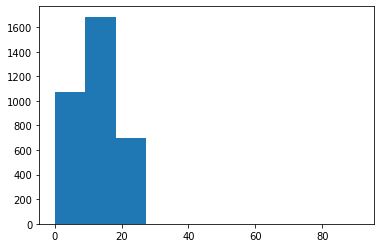

In [127]:

patches=plt.hist(int_ore)
np.arange()

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

In [103]:
#dataset=dataset.assign(Hour=new_ore)

ValueError: Length of values (6914) does not match length of index (4967)